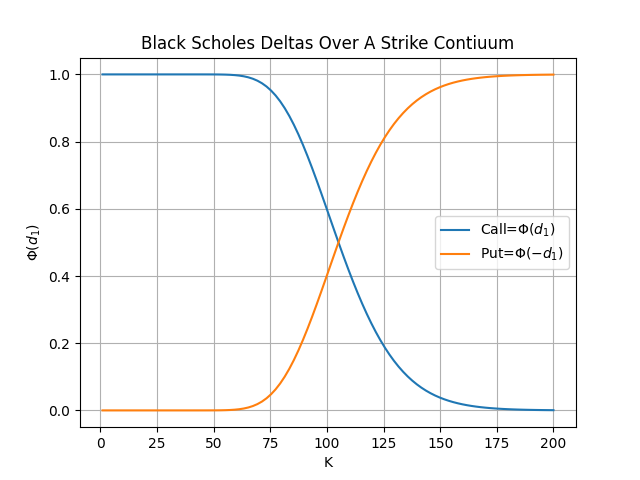

In [1]:
%matplotlib widget
#%matplotlib ipympl
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display, HTML
from ipywidgets import VBox,HBox, Layout
#! pip install latex
import latex

r = .03  # interest rate
sig = .2 # volatility
S0 = 100 # Initial Stock Price
T = 1 # Maturity

def bs_delta(S0, K, r, sig, T, call = True):
    d1 = (np.log(S0/K) + (r + sig**2/2) * T)/(sig*np.sqrt(T))
    norm = stats.norm
    if type(call) == bool:
        if call:
            return norm.cdf(d1,0,1)
        else:
            return norm.cdf(-d1,0,1)

K = np.linspace(1, 200, 100)

fig, ax = plt.subplots()
#fig.suptitle('matplotlib.axes.Axes.set_label() function \ Example\n', fontweight ="bold")
fig.set_label('my label')


#call_delta_plot, = ax.plot(K, bs_delta(S0,K,r,sig,T,True),label='Call')
call_delta_plot, = ax.plot(K, bs_delta(S0,K,r,sig,T,True),label=r'Call=$\Phi(d_1)$')
put_delta_plot, = ax.plot(K, bs_delta(S0,K,r,sig,T,False),label=r'Put=$\Phi(-d_1)$')

ax.title.set_text(r'Black Scholes Deltas Over A Strike Contiuum')
ax.set_xlabel(r'K')
ax.set_ylabel(r'$\Phi(d_1)$')
ax.legend()
ax.grid(True)

def update_maturity(change):
    #line.set_ydata(np.sin(change.new * x))
    call_delta_plot.set_ydata( bs_delta(S0,K,r,sig,change.new,True) )
    put_delta_plot.set_ydata( bs_delta(S0,K,r,sig,change.new,False) )
    fig.canvas.draw()

def update_volatility(change):
    #line.set_ydata(np.sin(change.new * x))
    call_delta_plot.set_ydata( bs_delta(S0,K,r,change.new,maturity_slider.value,True) )
    put_delta_plot.set_ydata( bs_delta(S0,K,r,change.new,maturity_slider.value,False) )
    fig.canvas.draw()

def update_display(change):
    #print(change)
    #print(change.owner.description)
    if 'Put' in change['owner'].description:
        if change['new']==False:
            #put_delta_plot.set_ydata( np.zeros(len(K)) )
            #fig.canvas.draw()
            put_delta_plot.remove()
        else:
            print(change)
            #fig.add_artist(put_delta_plot)
            ax.add_artist(put_delta_plot)
            #fig.canvas.draw()
            
            
    elif 'Call' in change['owner'].description:
        if change['new']==False:
            #put_delta_plot.set_ydata( np.zeros(len(K)) )
            #fig.canvas.draw()
            call_delta_plot.remove()
        else:
            #print(change)
            #fig.add_artist(call_delta_plot)
            ax.add_artist(call_delta_plot)
            #fig.canvas.draw()
    
    fig.canvas.draw()


maturity_slider = widgets.FloatSlider(value=T,min=0, max=T, step=0.1,description=r'Maturity',continuous_update=False)
volatility_slider = widgets.FloatSlider(value=sig,min=0+0.00001, max=0.6, step=0.05,description=r'Volatility',continuous_update=False)
show_call=widgets.Checkbox(value=True,description='Call',disabled=False)
show_put=widgets.Checkbox(value=True,description='Put',disabled=False)

maturity_slider.observe(update_maturity, 'value')
volatility_slider.observe(update_volatility, 'value')
show_call.observe(update_display,'value')
show_put.observe(update_display,'value')
#display(maturity_slider)

UI=VBox([
    HBox([maturity_slider]),
    HBox([volatility_slider]),
    HBox([show_call,show_put])
    ])

display(UI)


In [5]:
from ipywidgets.embed import embed_minimal_html

In [8]:
embed_minimal_html('my_export.html', views=[UI], title='Widgets export')